In [6]:
import numpy as np
from tqdm.notebook import tqdm
import glob
import sys
import os
from PIL import Image
from skimage import io

import matplotlib.pyplot as plt
from IPython import display

In [7]:
files = glob.glob('E:/datasets/validation/*.tif')
files[0:5]
img = io.imread(files[0])
img.shape
np.amax(img[4,:,:])
nCh_in = 3

In [8]:

# ------------ Main loop --------------
counter = 0     
for f in tqdm(range(len(files)),desc='Images checked'):

  file_path=files[f]
  
  try:
    img = np.array(io.imread(file_path))
    if np.amax(img[nCh_in+1,:,:]) == 0:
      os.remove(file_path)
      counter +=1
      print('Image id: '+ files[f] + ' was removed due to bad GT. Total images found: ' + str(counter))
    elif np.amax(img[0,:,:]) == 0:  
      os.remove(file_path)
      counter +=1
      print('Image id: '+ files[f] + ' was removed due to bad input. Total images found: ' + str(counter))     
  
  except:
    try:
      os.remove(file_path)
      print('Image id: '+ files[f] + ' was removed due to failed file read. Total images found: ' + str(counter)) 
      counter +=1
    except:
      print('Image id: '+ files[f] + ' failed to delete. Check file is present') 
      counter +=1  

print('Number of images removed :' + str(counter))

Images checked:   0%|          | 0/25 [00:00<?, ?it/s]

Number of images removed :0


import numpy as np
from tqdm.notebook import tqdm
import glob
import sys
import os
from PIL import Image
from skimage import io

import matplotlib.pyplot as plt
from IPython import display

folder = 'E:/attenborough-9k-1024/attenborough-frames'
y=[x[0] for x in os.walk(folder)]

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)

for f in range(len(y)-3856):
    files = glob.glob(y[f+3856]+'\*.jpg')
    if len(files)>8:
        display.clear_output()        
        read1 = io.imread(files[0]) 
        read2 = io.imread(files[8])

        ax1.clear()
        ax2.clear()
        ax1.imshow(read1)
        ax1.set_title(files[0])
        ax2.imshow(read2)
        
        plt.show()
        plt.pause(0.1)    

        display.display(fig)
        


In [9]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

# ------------ normalisation-------------
def threshold_and_norm(arr):

    arr = arr-np.amin(arr)
    arr = (arr/np.amax(arr))
    hist, bins = np.histogram(arr,16,[0, 1])
    ind = np.where(hist==np.amax(hist))
    mini = bins[ind[0][0]]
    maxi = bins[ind[0][0]+1]
    sub = (maxi+mini)/2
    arr = arr - sub
    arr[arr<0]=0
    arr = (arr/np.amax(arr))
    return arr

In [10]:
Io = io.imread('E:/datasets/valid/1000.tif')
frame = Io[0,:,:]
frame = threshold_and_norm(frame)
plt.imshow(frame)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\datasets\\valid\\1000.tif'

C:\Users\ew535\AppData\Local\Temp\ipykernel_27916\1999750252.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  SP[coords] = 1


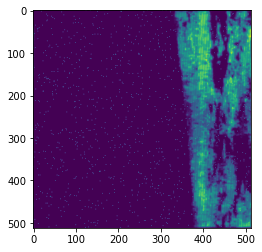

In [ ]:
SP = np.zeros([512,512])
row,col = frame.shape
s_vs_p = 0.05
amount = np.random.rand()*0.1
# Salt mode
num_salt = np.ceil(amount * frame.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt))
        for i in frame.shape]
SP[coords] = 1
Io = frame+SP
Io[Io>1]=1
plt.imshow(Io)
plt.show()